In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# own code library
from plotting import *

(config) no crisis measure selected.


In [2]:
abspath = r"C:\Users\Andy\PycharmProjects\finrlpaper2\MT-DRL-Pytorch"

#### Import and display raw datasets (US -> DJIA /Dow30 components, Japan -> TOPIX core 30 components)

In [3]:
df_us = pd.read_csv(os.path.join(abspath, "data", "raw", "US_stocks_WDB.csv"), index_col=0)
df_jp = pd.read_csv(os.path.join(abspath, "data", "raw", "JP_stocks_WDB.csv"), index_col=0)

# US dataset

In [4]:
comps_us = df_us.tic.unique()
print("us companies (tic) : \n", comps_us)
df_us.head()

us companies (tic) : 
 ['AAPL' 'AMGN' 'AXD.1' 'AXP' 'BA' 'CAT' 'CSCO' 'CVX' 'DIS' 'HD' 'HON'
 'IBM' 'INTC' 'JNJ' 'JPM' 'KO' 'MCD' 'MMM' 'MRK' 'MSFT' 'NKE' 'PFE' 'PG'
 'RTX' 'UNH' 'VZ' 'WBA' 'WMT' 'XOM' 'TAP.' 'JPM.PE.' 'JPM.PS.' '4764B'
 'JPM.PF.' 'JPM.PG.1' 'GS' 'JPM.PH.' 'TAP.AZ' 'TRV' 'CRM' 'V' 'JPM.PI'
 '0050B' '0051B' 'JPM.WS' 'JPM.PD.1' 'GS.PI' 'JPM.PA' 'JPM.PG' 'GS.PJ'
 'JPM.PB' 'GS.PK' 'JPM.PE' 'JPM.PF' 'JPM.PH' 'GS.PN' 'JPM.PD' 'HON.WI'
 'JPM.PC' 'DOW' 'JPM.PJ' 'JPM.PK' 'JPM.PL' 'MRK.WI']


,iid,datadate,tic,conm,ajexdi,cshoc,cshtrd,eps,prccd,prchd,prcld,prcod,prcstd,trfd
gvkey,,,,,,,,,,,,,,
1690,1,19950103,AAPL,APPLE INC,112.0,NaN,927400.0,NaN,38.375,38.875,37.875,NaN,3.0,1.083307
1602,1,19950103,AMGN,AMGEN INC,8.0,NaN,938700.0,NaN,58.250,59.125,58.000,NaN,3.0,1.000000
1447,2,19950103,AXD.1,AMERICAN EXPRESS CO,1.0,NaN,8800.0,NaN,42.000,42.375,41.750,NaN,3.0,1.056265
1447,1,19950103,AXP,AMERICAN EXPRESS CO,3.0,NaN,1321700.0,NaN,29.250,29.500,29.000,NaN,3.0,1.613449
2285,1,19950103,BA,BOEING CO,2.0,NaN,649600.0,NaN,46.750,47.125,46.125,NaN,3.0,1.311108


In [5]:
### in the printout above, we see that we have multiple versions of JPM, i.e. JPM.PA, JPM.PG, ...
# internet research shows, that these are multiple different "spin-offs" of JPM
# check if we can keep them all or need to remove some, based on time series availability
jpm_comps = [tic for tic in comps_us if 'JPM' in tic]
jpm_comps

['JPM',
 'JPM.PE.',
 'JPM.PS.',
 'JPM.PF.',
 'JPM.PG.1',
 'JPM.PH.',
 'JPM.PI',
 'JPM.WS',
 'JPM.PD.1',
 'JPM.PA',
 'JPM.PG',
 'JPM.PB',
 'JPM.PE',
 'JPM.PF',
 'JPM.PH',
 'JPM.PD',
 'JPM.PC',
 'JPM.PJ',
 'JPM.PK',
 'JPM.PL']

In [6]:
# calculate returns and log returns
df_us.sort_values(by=["tic", "datadate"], inplace=True, ascending=True)
df_us.head()

,iid,datadate,tic,conm,ajexdi,cshoc,cshtrd,eps,prccd,prchd,prcld,prcod,prcstd,trfd
gvkey,,,,,,,,,,,,,,
179534,2,20090211,0050B,VISA INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179534,2,20090513,0050B,VISA INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179534,2,20090812,0050B,VISA INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179534,2,20091112,0050B,VISA INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179534,2,20100210,0050B,VISA INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# calculate rlog price
df_us["log_prccd"] = np.log(df_us["prccd"])
df_us.tail()

,iid,datadate,tic,conm,ajexdi,cshoc,cshtrd,eps,prccd,prchd,prcld,prcod,prcstd,trfd,log_prccd
gvkey,,,,,,,,,,,,,,,
4503,1,20210607,XOM,EXXON MOBIL CORP,1.0,4.233539e+09,15471470.0,-4.47,61.05,61.7300,61.02,61.33,3.0,4.031367,4.111693
4503,1,20210608,XOM,EXXON MOBIL CORP,1.0,4.233539e+09,28939620.0,-4.47,62.13,62.4800,60.67,61.50,3.0,4.031367,4.129229
4503,1,20210609,XOM,EXXON MOBIL CORP,1.0,4.233539e+09,28959160.0,-4.47,62.65,63.4200,62.19,62.67,3.0,4.031367,4.137564
4503,1,20210610,XOM,EXXON MOBIL CORP,1.0,4.233539e+09,27474610.0,-4.47,62.75,63.9750,62.25,63.61,3.0,4.031367,4.139159
4503,1,20210611,XOM,EXXON MOBIL CORP,1.0,4.233539e+09,17617610.0,-4.47,62.17,63.1922,62.14,63.01,3.0,4.031367,4.129873


C:\Users\Andy\PycharmProjects\finrlpaper2\MT-DRL-Pytorch\dataprep\plotting.py:96: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ncol=1)


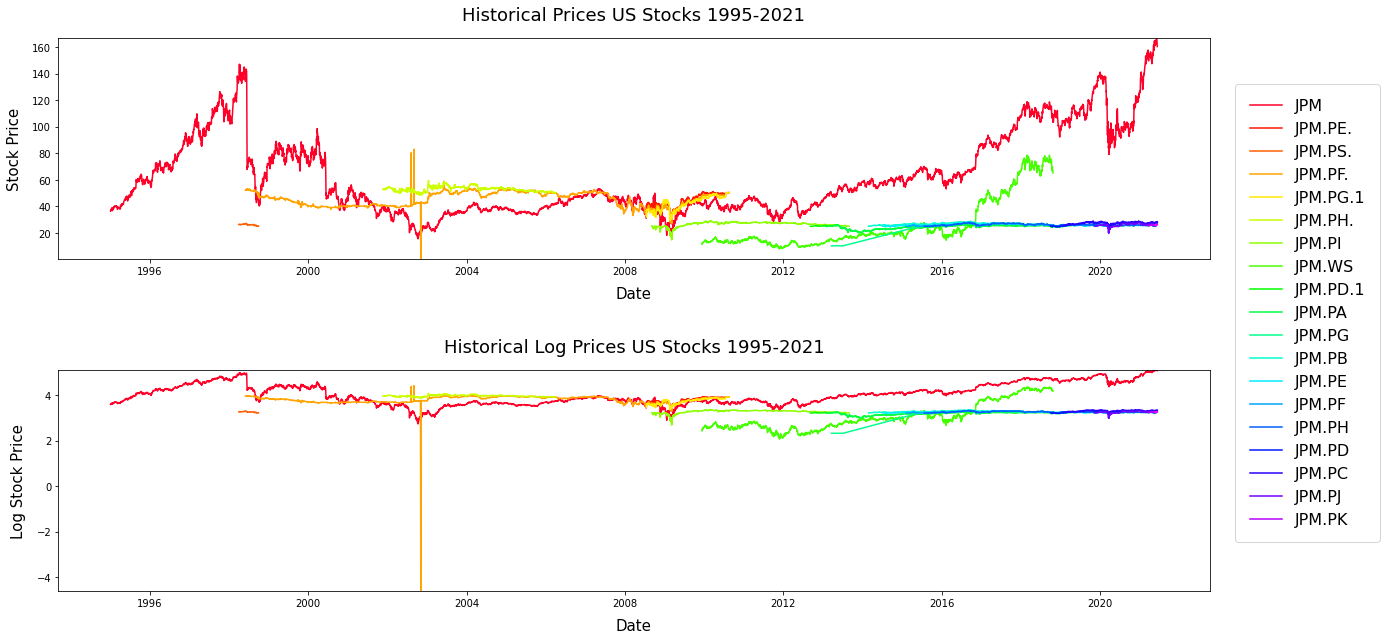

In [8]:
plot_historical_ts(df=df_us,
                   subplot_rows=2, 
                   subplot_cols=1,
                   datecol="datadate",
                   comp_name_column="tic",
                   comp_names_list=jpm_comps, 
                   x_cols_list=["datadate"]*2,
                   y_cols_list=["prccd", "log_prccd"],
                   titles_list=["Historical Prices US Stocks 1995-2021", 
                                "Historical Log Prices US Stocks 1995-2021"],
                   x_labels_list=["Date", "Date"],
                   y_labels_list=["Stock Price", "Log Stock Price"],
                   ylim_left_list=[df_us["prccd"][df_us["tic"].isin(jpm_comps)].min(),
                                   df_us["log_prccd"][df_us["tic"].isin(jpm_comps)].min()], 
                   ylim_right_list=[df_us["prccd"][df_us["tic"].isin(jpm_comps)].max(),
                                    df_us["log_prccd"][df_us["tic"].isin(jpm_comps)].max()],
                   figsize=(17,9), 
                   space_between_plots=0.5, 
                   legend_location="right", 
                   legend_location_exact=(0.01, -0.04, 1.12, 1.1), # (right_loc, loc,up_loc, right_loc, up_loc )
                   legend_borderpad=0.9, 
                   legend_borderaxespad=0., 
                   legend_fontsize=16., 
                   label_fontsize=15.,
                   title_fontsize=18., 
                   title_pad=18., 
                   label_pad=10.)

In [9]:
### above in the plot we see: only JPM is available for the whole time range
# therefore we will remove all the other JPM.x companies and only keep JPM
# get dataset for all tics not in jpm_list, except for the first entry (this one is JPM, which we want to keep)
df_us = df_us[~df_us["tic"].isin(jpm_comps[1:])]

In [10]:
df_us["tic"].unique()
# we see we still have some potentially problematic (pp) cases such as
# AXD.1, TAP., 4764B, TAP.AZ, 0050B, 0051B, GS.PI, GS.PJ, GS.PK, GS.PN, HON.WI, MRK.WI
pp_tics = ["AXD.1", "TAP.", "4764B", "TAP.AZ", "0050B", "0051B", 
           "GS.PI", "GS.PJ", "GS.PK", "GS.PN", "HON.WI", "MRK.WI"]

C:\Users\Andy\PycharmProjects\finrlpaper2\MT-DRL-Pytorch\dataprep\plotting.py:96: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ncol=1)


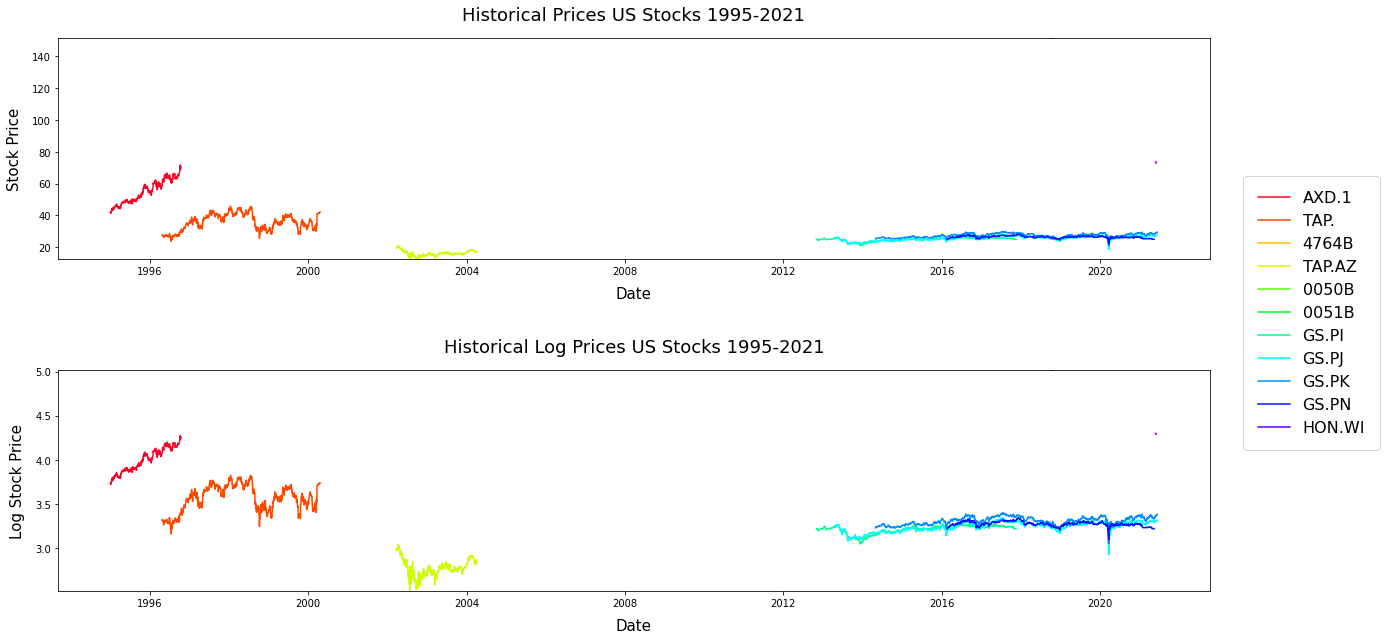

In [11]:
plot_historical_ts(df=df_us,
                   subplot_rows=2, subplot_cols=1,
                   datecol="datadate",
                   comp_name_column="tic", 
                   comp_names_list=pp_tics, 
                   x_cols_list=["datadate"]*2,
                   y_cols_list=["prccd", "log_prccd"],
                   x_labels_list=["Date", "Date"],
                   y_labels_list=["Stock Price", "Log Stock Price"],
                   titles_list=["Historical Prices US Stocks 1995-2021", 
                                "Historical Log Prices US Stocks 1995-2021"],
                   ylim_left_list=[df_us["prccd"][df_us["tic"].isin(pp_tics)].min(),
                                   df_us["log_prccd"][df_us["tic"].isin(pp_tics)].min()], 
                   ylim_right_list=[df_us["prccd"][df_us["tic"].isin(pp_tics)].max(),
                                    df_us["log_prccd"][df_us["tic"].isin(pp_tics)].max()],
                   figsize=(17,9), 
                   space_between_plots=0.5, 
                   legend_location="right", 
                   legend_location_exact=(0.01, -0.04, 1.12, 1.1),
                   legend_borderpad=0.9, 
                   legend_borderaxespad=0., 
                   legend_fontsize=16., 
                   label_fontsize=15.,
                   title_fontsize=18., 
                   title_pad=18., 
                   label_pad=10.)

In [12]:
### NOTE: above we see, that none of these 12 companies seem to be available for a long time range
# therefore they are not the right companies for the underlying work, we remove them from the us dataset
df_us = df_us[~df_us["tic"].isin(pp_tics)]
print(len(df_us["tic"].unique())) # 33 tics remaining
df_us["tic"].unique()

33


array(['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS',
       'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD',
       'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'RTX', 'TRV', 'UNH', 'V',
       'VZ', 'WBA', 'WMT', 'XOM'], dtype=object)

In [13]:
first_occurrence_date = {}
for tic in df_us["tic"].unique():
    firstdate = df_us.loc[df_us["tic"] == tic]["datadate"].values[0]
    first_occurrence_date.update({tic: firstdate})
print(first_occurrence_date)
### NOTE .
# we see that all stocks are available back until 19950103, except for GS (1999) TRV (2002), CRM (2004),
# V (2008) and DOW (2019)
# the main paper I used in this thesis used GS, TRV and V, but they did not use data before 2009
# I will drop the problematic companies except for GS (1999) and use the data from 1999-2008 for backtesting
droptics = ["TRV", "CRM", "V", "DOW"]

{'AAPL': 19950103, 'AMGN': 19950103, 'AXP': 19950103, 'BA': 19950103, 'CAT': 19950103, 'CRM': 20040623, 'CSCO': 19950103, 'CVX': 19950103, 'DIS': 19950103, 'DOW': 20190320, 'GS': 19990504, 'HD': 19950103, 'HON': 19950103, 'IBM': 19950103, 'INTC': 19950103, 'JNJ': 19950103, 'JPM': 19950103, 'KO': 19950103, 'MCD': 19950103, 'MMM': 19950103, 'MRK': 19950103, 'MSFT': 19950103, 'NKE': 19950103, 'PFE': 19950103, 'PG': 19950103, 'RTX': 19950103, 'TRV': 20020807, 'UNH': 19950103, 'V': 20080319, 'VZ': 19950103, 'WBA': 19950103, 'WMT': 19950103, 'XOM': 19950103}


In [14]:
df_us = df_us[~df_us["tic"].isin(droptics)]
print(len(df_us["tic"].unique())) # 33 tics remaining
df_us["tic"].unique()
### Note: we now have "Only" 29 stocks left, could add another one but I think 29 stocks are ok

29


array(['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS',
       'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM',
       'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'RTX', 'UNH', 'VZ', 'WBA',
       'WMT', 'XOM'], dtype=object)

In [15]:
last_occurrence_date = {}
for tic in df_us["tic"].unique():
    lastdate = df_us.loc[df_us["tic"] == tic]["datadate"].values[-1]
    last_occurrence_date.update({tic: lastdate})
print(last_occurrence_date)
# NOTE: we see that all stock time series values are available up to date

{'AAPL': 20210611, 'AMGN': 20210611, 'AXP': 20210701, 'BA': 20210611, 'CAT': 20210719, 'CSCO': 20210702, 'CVX': 20210611, 'DIS': 20210611, 'GS': 20210611, 'HD': 20210611, 'HON': 20210611, 'IBM': 20210611, 'INTC': 20210611, 'JNJ': 20210611, 'JPM': 20210702, 'KO': 20210614, 'MCD': 20210611, 'MMM': 20210611, 'MRK': 20210614, 'MSFT': 20210611, 'NKE': 20210611, 'PFE': 20210611, 'PG': 20210611, 'RTX': 20210611, 'UNH': 20210618, 'VZ': 20210708, 'WBA': 20210611, 'WMT': 20210611, 'XOM': 20210611}


C:\Users\Andy\PycharmProjects\finrlpaper2\MT-DRL-Pytorch\dataprep\plotting.py:96: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ncol=1)


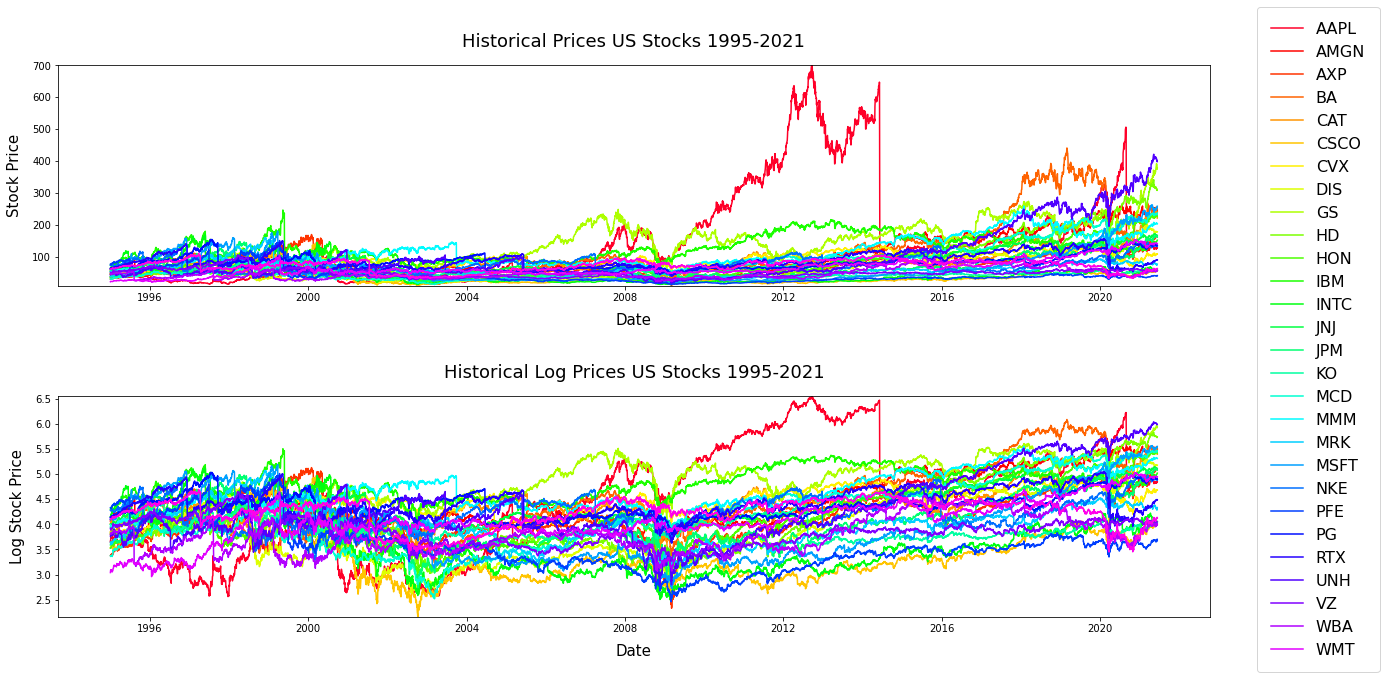

In [16]:
resid_tics = df_us["tic"].unique()
plot_historical_ts(df=df_us,
                   subplot_rows=2, subplot_cols=1,
                   datecol="datadate",
                   comp_name_column="tic", 
                   comp_names_list=resid_tics, 
                   x_cols_list=["datadate"]*2,
                   y_cols_list=["prccd", "log_prccd"],
                   x_labels_list=["Date", "Date"],
                   y_labels_list=["Stock Price", "Log Stock Price"],
                   titles_list=["Historical Prices US Stocks 1995-2021", 
                                "Historical Log Prices US Stocks 1995-2021"],
                   ylim_left_list=[df_us["prccd"][df_us["tic"].isin(resid_tics)].min(),
                                   df_us["log_prccd"][df_us["tic"].isin(resid_tics)].min()], 
                   ylim_right_list=[df_us["prccd"][df_us["tic"].isin(resid_tics)].max(),
                                    df_us["log_prccd"][df_us["tic"].isin(resid_tics)].max()],
                   figsize=(17,9), 
                   space_between_plots=0.5, 
                   legend_location="right", 
                   legend_location_exact=(0.01, -0.04, 1.12, 1.1),
                   legend_borderpad=0.9, 
                   legend_borderaxespad=0., 
                   legend_fontsize=16., 
                   label_fontsize=15.,
                   title_fontsize=18., 
                   title_pad=18., 
                   label_pad=10.)

In [17]:
# save US dataset with some tickers dropped as indicated above
# to "intermediate" data folder
df_us.to_csv(os.path.join(abspath,"data", "intermediate", "US_stocks_WDB_a.csv"))

In [18]:
df_us.head(3)

,iid,datadate,tic,conm,ajexdi,cshoc,cshtrd,eps,prccd,prchd,prcld,prcod,prcstd,trfd,log_prccd
gvkey,,,,,,,,,,,,,,,
1690,1,19950103,AAPL,APPLE INC,112.0,NaN,927400.0,NaN,38.375,38.875,37.875,NaN,3.0,1.083307,3.647406
1690,1,19950104,AAPL,APPLE INC,112.0,NaN,1416800.0,NaN,39.375,39.625,38.625,NaN,3.0,1.083307,3.673131
1690,1,19950105,AAPL,APPLE INC,112.0,NaN,657500.0,NaN,38.875,39.375,38.750,NaN,3.0,1.083307,3.660351


### Check Time series statistics

In [19]:
#check for 0 stock price
for tic in df_us["tic"].unique():
    subset = df_us.loc[df_us["tic"]==tic]
    print(tic)
    print(subset["prccd"].describe())

AAPL
count    6658.000000
mean      148.709962
std       152.994050
min        12.938000
25%        34.187500
50%       102.761250
75%       187.627525
max       702.100000
Name: prccd, dtype: float64
AMGN
count    6658.000000
mean       96.591350
std        56.835574
min        31.070000
25%        57.290000
50%        66.900000
75%       140.865000
max       260.950000
Name: prccd, dtype: float64
AXP
count    6658.000000
mean       67.776778
std        30.850807
min        10.260000
25%        45.000000
50%        57.400000
75%        87.257500
max       169.000000
Name: prccd, dtype: float64
BA
count    6658.000000
mean      106.574646
std        88.181948
min        25.060000
25%        49.955000
50%        72.930000
75%       128.917500
max       440.620000
Name: prccd, dtype: float64
CAT
count    6658.000000
mean       80.777239
std        35.114462
min        22.170000
25%        55.803125
50%        74.220000
75%        94.515000
max       244.790000
Name: prccd, dtype: float64

### Correlation of returns for US stocks

In [20]:
# first, we need to calculate daily returns
df_us = df_us.sort_values(by=["tic", "datadate"])
df_us.head()

,iid,datadate,tic,conm,ajexdi,cshoc,cshtrd,eps,prccd,prchd,prcld,prcod,prcstd,trfd,log_prccd
gvkey,,,,,,,,,,,,,,,
1690,1,19950103,AAPL,APPLE INC,112.0,NaN,927400.0,NaN,38.375,38.875,37.875,NaN,3.0,1.083307,3.647406
1690,1,19950104,AAPL,APPLE INC,112.0,NaN,1416800.0,NaN,39.375,39.625,38.625,NaN,3.0,1.083307,3.673131
1690,1,19950105,AAPL,APPLE INC,112.0,NaN,657500.0,NaN,38.875,39.375,38.750,NaN,3.0,1.083307,3.660351
1690,1,19950106,AAPL,APPLE INC,112.0,NaN,9613000.0,NaN,42.000,43.125,41.125,NaN,3.0,1.083307,3.737670
1690,1,19950109,AAPL,APPLE INC,112.0,NaN,2447000.0,NaN,41.203,41.875,41.000,NaN,3.0,1.083307,3.718511


In [21]:
df_us["tic"].unique()

array(['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS',
       'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM',
       'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'RTX', 'UNH', 'VZ', 'WBA',
       'WMT', 'XOM'], dtype=object)

In [22]:
temp_df = pd.DataFrame()
for tic in df_us["tic"].unique():
    #print(tic)
    #if tic == "AAPL": 
    #    print(df_us[df_us["tic"] == tic]["prccd"])
    temp_ind = df_us[df_us["tic"] == tic]["prccd"].pct_change()
    #if tic == "XOM": 
    #    print(temp_ind)
    temp_ind = pd.DataFrame(temp_ind)
    temp_df = temp_df.append(temp_ind, ignore_index=True)
    #if tic == "XOM": 
    #    print(temp_df)
   # if tic == "AAPL": 
    #    print(temp_df)
df_us["return_daily"] = temp_df["prccd"].values
df_us.dropna(axis="rows", inplace=True)
df_us.head()

,iid,datadate,tic,conm,ajexdi,cshoc,cshtrd,eps,prccd,prchd,prcld,prcod,prcstd,trfd,log_prccd,return_daily
gvkey,,,,,,,,,,,,,,,,
1690,1,20040827,AAPL,APPLE INC,56.0,387925000.0,6943089.0,0.58,34.35,34.76,34.00,34.61,3.0,1.095663,3.536602,-0.008944
1690,1,20040830,AAPL,APPLE INC,56.0,387925000.0,3895568.0,0.58,34.12,34.72,33.96,34.01,3.0,1.095663,3.529884,-0.006696
1690,1,20040831,AAPL,APPLE INC,56.0,387925000.0,6759951.0,0.58,34.49,34.95,34.00,34.07,3.0,1.095663,3.540669,0.010844
1690,1,20040901,AAPL,APPLE INC,56.0,387925000.0,9211926.0,0.58,35.86,35.99,34.19,34.30,3.0,1.095663,3.579622,0.039722
1690,1,20040902,AAPL,APPLE INC,56.0,387925000.0,7255751.0,0.58,35.66,35.81,34.83,35.50,3.0,1.095663,3.574030,-0.005577


In [23]:
# for this we need to pivot the dataframe
df_us_pivot = df_us.pivot("datadate","tic","return_daily").reset_index()
df_us_pivot.head()

tic,datadate,AAPL,AMGN,AXP,BA,CAT,CSCO,CVX,DIS,GS,...,MSFT,NKE,PFE,PG,RTX,UNH,VZ,WBA,WMT,XOM
0,20040827,-0.008944,0.008790,-0.002394,-0.001536,-0.000136,0.015649,0.007830,-0.000882,-0.007024,...,0.000729,-0.000132,0.010523,0.005027,-0.001817,0.005207,-0.001282,-0.003264,-0.005939,0.004199
1,20040830,-0.006696,-0.011227,-0.007400,-0.002308,-0.019674,-0.022599,0.002625,-0.011474,-0.014699,...,-0.005827,-0.016063,-0.011026,-0.008396,-0.001071,-0.007313,0.001797,-0.009279,-0.006721,-0.006822
2,20040831,0.010844,0.004745,0.007858,0.006748,0.006228,-0.014188,0.020942,0.002232,0.005609,...,0.000000,0.007761,0.011768,0.008287,0.006430,0.014886,0.005637,0.004132,-0.009962,0.021493
3,20040901,0.039722,0.000843,0.001799,0.003255,-0.001100,0.017591,0.012000,0.001336,-0.005131,...,0.003297,0.010224,-0.009795,0.004109,0.000426,0.008166,0.006369,-0.004390,-0.000759,0.007375
4,20040902,-0.005577,0.009606,0.005987,0.022905,0.007298,0.011001,0.009932,0.001335,0.020966,...,0.008397,0.007886,0.010819,0.005160,0.019585,0.010199,0.011392,0.029209,0.007410,0.011628


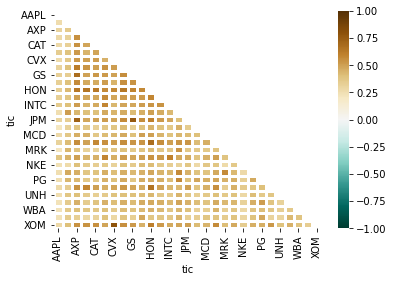

In [24]:
make_corr(df_pivoted=df_us_pivot,
         columns_to_drop_for_calculation=["datadate"])
### Note: we see the stocks are all positively correlated over the whole time series available.
# This has (negative) implications for our diversification possibilities within a portfolio

In [25]:
# let's check if correlation has changed over time and break it down into multiple time series
# just for checking

# take data from 2000 on
df_us_pivot_2000_2004 = df_us_pivot[(df_us_pivot["datadate"] >=20000101)&(df_us_pivot["datadate"] <=20041231)]
df_us_pivot_2005_2009 = df_us_pivot[(df_us_pivot["datadate"] >=20050101)&(df_us_pivot["datadate"] <=20091231)]
df_us_pivot_2010_2014 = df_us_pivot[(df_us_pivot["datadate"] >=20100101)&(df_us_pivot["datadate"] <=20141231)]
df_us_pivot_2015_2021 = df_us_pivot[(df_us_pivot["datadate"] >=20150101)]

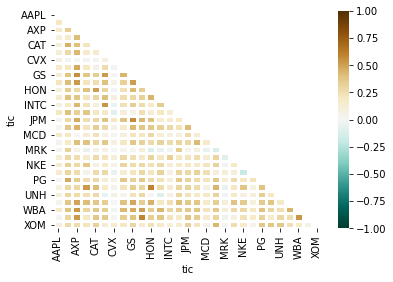

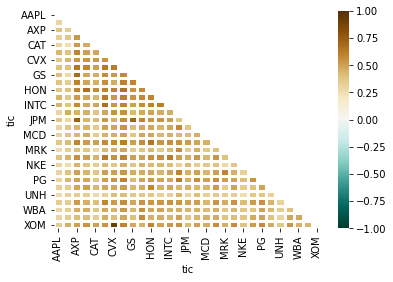

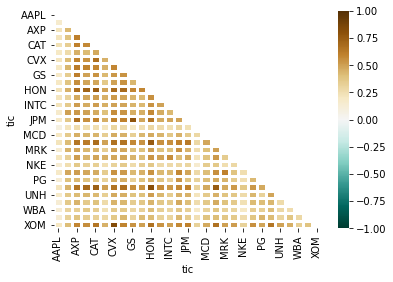

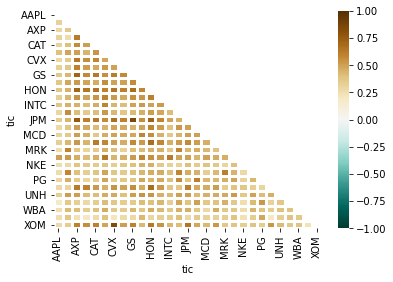

In [26]:
df_list = [df_us_pivot_2000_2004, df_us_pivot_2005_2009, df_us_pivot_2010_2014, df_us_pivot_2015_2021]
for df in df_list:
    make_corr(df_pivoted=df, columns_to_drop_for_calculation=["datadate"])
### NOTE: we see that in the first plot, the one from 2000-nd of 2004, the correlations between the companies 
# are less strong
# this could be because some of them might not have been in the DJIA index by then yet, meaning they were not as
# large yet